In [1]:
# Initial Python environment setup...
import numpy as np # linear algebra
import pandas as pd # CSV file I/O (e.g. pd.read_csv)
import os # reading the input files we have access to

In [2]:
train_df =  pd.read_csv('train.csv', nrows = 10_000_00)
train_df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [3]:
train_df.shape

(1000000, 8)

In [4]:
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.plotly as py
from plotly import tools
%matplotlib inline

In [8]:
train_df['pickup_datetime']= pd.to_datetime(train_df['pickup_datetime'])


In [10]:
train_df['pickup_day_of_week']=train_df['pickup_datetime'].dt.dayofweek

In [11]:
train_df['pickup_month']=train_df['pickup_datetime'].dt.month

In [16]:
train_df.tail()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day_of_week,pickup_month
999995,2014-09-13 21:44:38.0000001,7.0,2014-09-13 21:44:38,-73.976676,40.785630,-73.959196,40.775114,1,5,9
999996,2010-09-20 14:50:37.0000002,7.3,2010-09-20 14:50:37,-73.992103,40.671385,-73.992103,40.671385,2,0,9
999997,2013-04-26 14:03:00.000000118,10.5,2013-04-26 14:03:00,-73.978423,40.751135,-73.993397,40.762197,5,4,4
999998,2011-07-08 00:29:00.00000099,6.9,2011-07-08 00:29:00,-73.980317,40.759482,-73.976832,40.743122,1,4,7
999999,2009-12-31 14:30:00.00000021,4.1,2009-12-31 14:30:00,-74.006635,40.741598,-73.999450,40.745702,1,3,12


In [17]:
train_df['pickup_date']=train_df['pickup_datetime'].dt.date

In [19]:
train_df.loc[train_df["pickup_date"] == "2009-12-31"]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day_of_week,pickup_month,pickup_date


In [20]:
train_df.dtypes

key                           object
fare_amount                  float64
pickup_datetime       datetime64[ns]
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
passenger_count                int64
pickup_day_of_week             int64
pickup_month                   int64
pickup_date                   object
dtype: object

In [30]:
train_df['pickup_date'] =train_df['pickup_date'].astype(str)


In [25]:
train_df.dtypes

key                           object
fare_amount                  float64
pickup_datetime       datetime64[ns]
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
passenger_count                int64
pickup_day_of_week             int64
pickup_month                   int64
pickup_date                   object
dtype: object

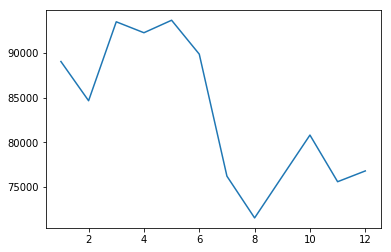

In [46]:
train_df["pickup_month"].value_counts().sort_index().plot()

In [37]:
train_df.sort_values('pickup_day_of_week', ascending = True, inplace= True)

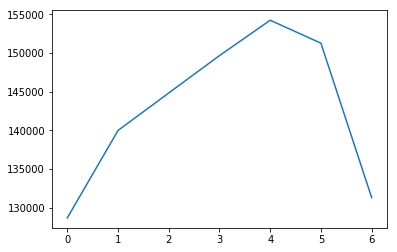

In [43]:
train_df["pickup_day_of_week"].value_counts().sort_index().plot()

In [31]:
train_df['pickup_hour']=train_df['pickup_datetime'].dt.hour

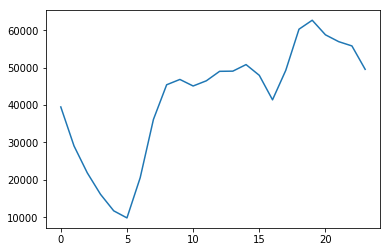

In [45]:
train_df['pickup_hour'].value_counts().sort_index().plot()

In [48]:
train_df['pickup_year']=train_df['pickup_datetime'].dt.year

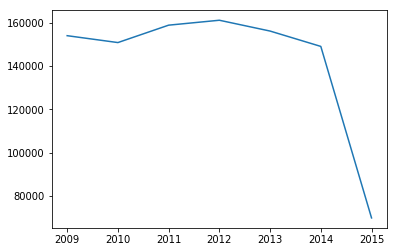

In [49]:
train_df['pickup_year'].value_counts().sort_index().plot()

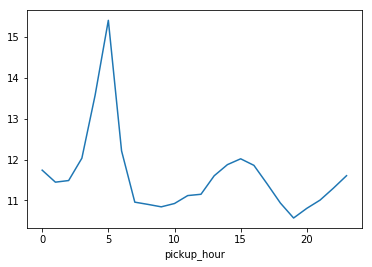

In [53]:
train_df.groupby('pickup_hour')['fare_amount'].mean().plot()

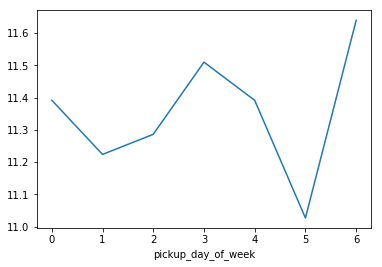

In [54]:
train_df.groupby('pickup_day_of_week')['fare_amount'].mean().plot()

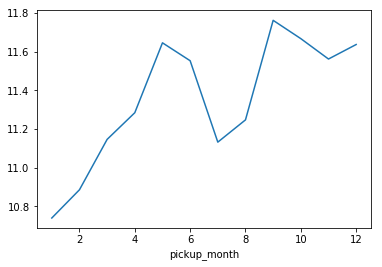

In [55]:
train_df.groupby('pickup_month')['fare_amount'].mean().plot()

In [56]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 305517
Data columns (total 13 columns):
key                   1000000 non-null object
fare_amount           1000000 non-null float64
pickup_datetime       1000000 non-null datetime64[ns]
pickup_longitude      1000000 non-null float64
pickup_latitude       1000000 non-null float64
dropoff_longitude     999990 non-null float64
dropoff_latitude      999990 non-null float64
passenger_count       1000000 non-null int64
pickup_day_of_week    1000000 non-null int64
pickup_month          1000000 non-null int64
pickup_date           1000000 non-null object
pickup_hour           1000000 non-null int64
pickup_year           1000000 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(5), object(2)
memory usage: 106.8+ MB


In [57]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day_of_week,pickup_month,pickup_hour,pickup_year
count,1000000.000000,1000000.000000,1000000.000000,999990.000000,999990.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,11.348079,-72.526640,39.929008,-72.527860,39.919954,1.684924,3.039856,6.267875,13.509477,2011.741106
std,9.822090,12.057937,7.626154,11.324494,8.201418,1.323911,1.949970,3.436243,6.513840,1.860754
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000,0.000000,1.000000,0.000000,2009.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000,1.000000,3.000000,9.000000,2010.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000,3.000000,6.000000,14.000000,2012.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000,5.000000,9.000000,19.000000,2013.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000,6.000000,12.000000,23.000000,2015.000000


In [59]:
train_df["fare_amount"].plot()

AttributeError: 'AxesSubplot' object has no attribute 'show'

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000000008736EA0> (for post_execute):


OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 432x288 with 1 Axes>